In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from sqlite3 import connect

In [7]:
conn = connect(r'C:\Users\пк\school21\project11\data\checking-logs.sqlite')

    _Анализируйте только пользователей, а не администраторов.
    _Используйте фильтр status = 'ready' для коммитов.
    _азмеры шрифта и figsize такие же, как и раньше.
    _Ночь — с 0:00:00 до 03:59:59, утро — с 04:00:00 до 09:59:59, день — с 10:00:00 до 16:59:59, вечер — с 17:00:00 до 23:59:59.

In [8]:
query= '''
SELECT timestamp as commit_time
FROM checker
WHERE status = 'ready'
AND uid LIKE 'user%'
''' 
df = pd.io.sql.read_sql(query,conn,parse_dates='commit_time')
df.head()

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104


In [9]:
df['date']=df['commit_time'].dt.date
df['hour']=df['commit_time'].dt.hour

cut_time=['Ночь','Утро','День','Вечер']
cut_bins=[0,4,10,17,24]
df['daytime']=pd.cut(df['hour'],bins=cut_bins,labels=cut_time,right=False)

In [10]:
df

,commit_time,date,hour,daytime
0,2020-04-17 05:19:02.744528,2020-04-17,5,Утро
1,2020-04-17 05:22:45.549397,2020-04-17,5,Утро
2,2020-04-17 05:34:24.422370,2020-04-17,5,Утро
3,2020-04-17 05:43:27.773992,2020-04-17,5,Утро
4,2020-04-17 05:46:32.275104,2020-04-17,5,Утро
...,...,...,...,...
1681,2020-05-21 20:01:48.959966,2020-05-21,20,Вечер
1682,2020-05-21 20:18:54.487900,2020-05-21,20,Вечер
1683,2020-05-21 20:19:06.872761,2020-05-21,20,Вечер
1684,2020-05-21 20:22:41.877806,2020-05-21,20,Вечер


In [11]:
df['views']=1
df1=df.drop(columns=['commit_time','hour']).groupby(by=['date','daytime'],dropna=False).count()
df1.head(10)

views
date       daytime       
2020-04-17 Ночь         0
           Утро         7
           День         6
           Вечер        0
2020-04-18 Ночь         0
           Утро         1
           День        19
           Вечер       19
2020-04-19 Ночь         1
           Утро         2

In [12]:
df2=pd.pivot_table(df1,values='views',columns='daytime',index='date')
df2.head()

daytime,Ночь,Утро,День,Вечер
date,,,,
2020-04-17,0,7,6,0
2020-04-18,0,1,19,19
2020-04-19,1,2,9,6
2020-04-20,0,0,8,8
2020-04-21,0,0,0,13


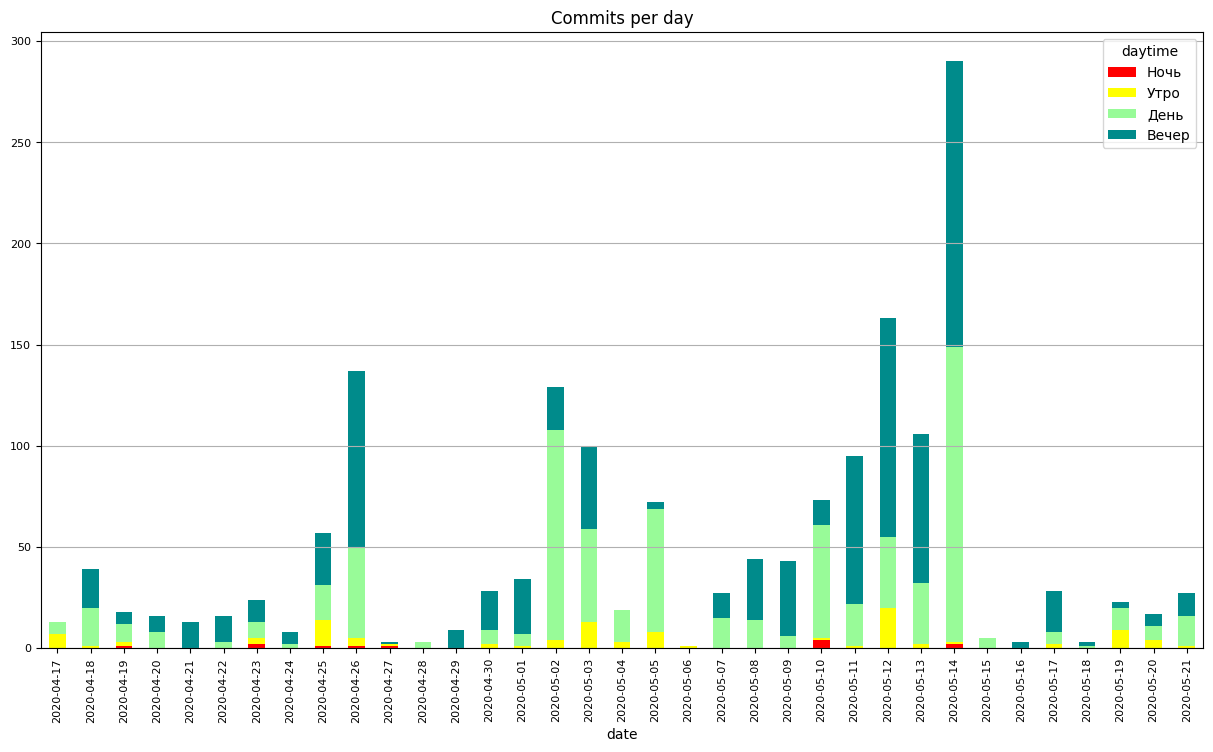

In [13]:
df2.plot(
      kind='bar',
      stacked=True,
      fontsize=8,
      figsize=(15,8),
      title='Commits per day',
      xlabel='date',
      rot=90,
      color=['red','yellow','palegreen','darkcyan'],
)
plt.gca().yaxis.grid(True)
plt.show()

День и вечер

2020-05-12

In [15]:
conn.close()